In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [3]:
df = pd.read_csv("Credit.csv", index_col = 0)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


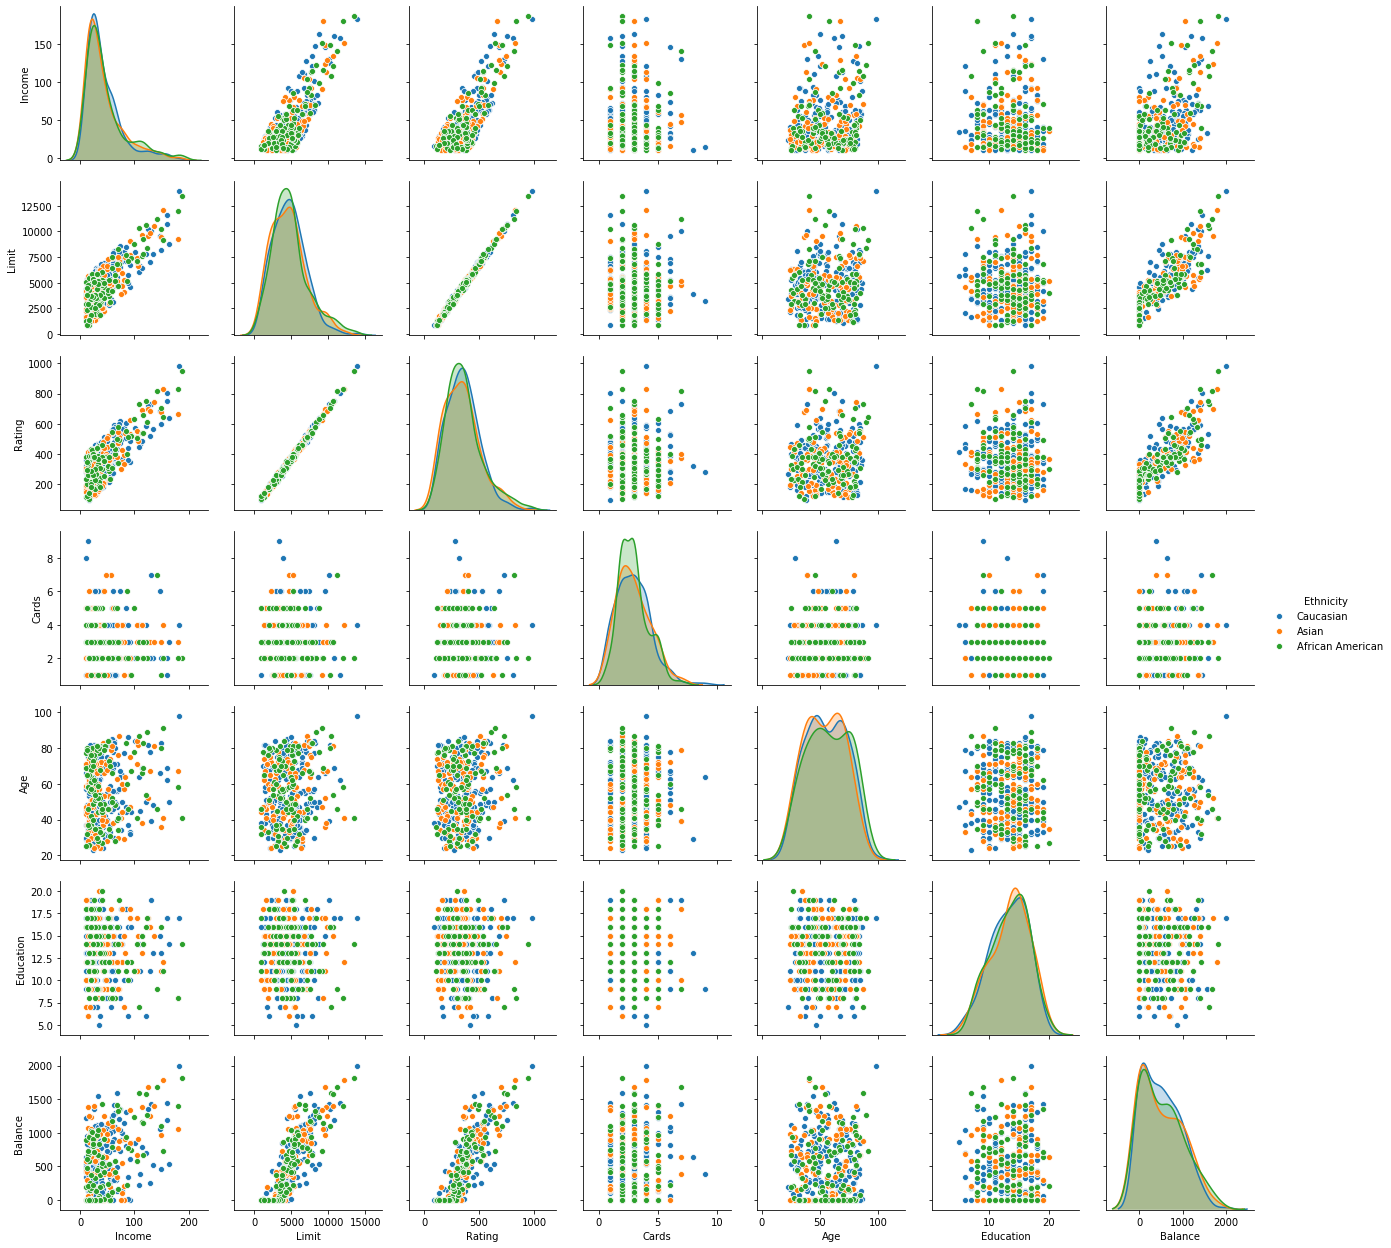

In [4]:
sns.pairplot(df, hue="Ethnicity")

In [3]:
df2 = pd.get_dummies(df, columns = ["Gender", "Student","Married","Ethnicity"], drop_first = True)
df2.head(10)

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,333,0,0,1,0,1
2,106.025,6645,483,3,82,15,903,1,1,1,1,0
3,104.593,7075,514,4,71,11,580,0,0,0,1,0
4,148.924,9504,681,3,36,11,964,1,0,0,1,0
5,55.882,4897,357,2,68,16,331,0,0,1,0,1
6,80.180,8047,569,4,77,10,1151,0,0,0,0,1
7,20.996,3388,259,2,37,12,203,1,0,0,0,0
8,71.408,7114,512,2,87,9,872,0,0,0,1,0
9,15.125,3300,266,5,66,13,279,1,0,0,0,1
10,71.061,6819,491,3,41,19,1350,1,1,1,0,0


In [4]:
reg = linear_model.LinearRegression()
reg.fit(df2[["Gender_Female"]],df2[["Balance"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
ssr = ((df2["Balance"].values-reg.predict(df2[["Gender_Female"]]).reshape(1,-1))**2).sum()
rse = np.sqrt(ssr/(len(df2)-2))
se = rse/(np.sqrt((((df2["Gender_Female"].values - df2["Gender_Female"].mean())**2).sum())))

In [6]:
tstat = reg.coef_/se
pval = stats.t(len(df2)-1).sf(tstat)*2
pval
reg.coef_

array([[19.73312308]])

In [7]:
reg2 = linear_model.LinearRegression()
reg2.fit(df2[["Ethnicity_Asian","Ethnicity_Caucasian"]],df2[["Balance"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
ssr = ((df2["Balance"].values-reg2.predict(df2[["Ethnicity_Asian","Ethnicity_Caucasian"]]).reshape(1,-1))**2).sum()
sst = ((df2["Balance"].values-df2["Balance"].values.mean())**2).sum()

df_ssr = len(reg2.coef_[0])
df_sst = len(df2)-len(reg2.coef_[0])-1

In [65]:
fstat = ((sst-ssr)/df_ssr)/(ssr/df_sst)
pval = stats.f(df_ssr,df_sst).sf(fstat)
pval

0.9574918881199579

In [66]:
reg3 = linear_model.LinearRegression()
reg3.fit(df2[["Student_Yes"]],df2[["Balance"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
ssr = ((df2["Balance"].values-reg3.predict(df2[["Student_Yes"]]).reshape(1,-1))**2).sum()
rse = np.sqrt(ssr/(len(df2)-2))
se = rse/(np.sqrt((((df2["Student_Yes"].values-df2["Student_Yes"].mean())**2).sum())))
reg3.coef_

array([[396.45555556]])

In [73]:
tstat = reg3.coef_/se
pval = stats.t(len(df2)-1).sf(tstat)*2
pval

array([[1.48586326e-07]])

In [74]:
reg4 = linear_model.LinearRegression()
reg4.fit(df2[["Married_Yes"]],df2[["Balance"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
ssr = ((df2["Balance"].values-reg4.predict(df2[["Married_Yes"]]).reshape(1,-1))**2).sum()
rse = np.sqrt(ssr/(len(df2)-2))
se = rse/(np.sqrt((((df2["Married_Yes"].values-df2["Married_Yes"].mean())**2).sum())))
reg4.coef_

array([[-5.34746544]])

In [78]:
tstat = np.abs(reg4.coef_)/se
pval = stats.t(len(df2)-1).sf(tstat)*2
pval

array([[0.90993876]])

In [79]:
reg5 = linear_model.LinearRegression()
reg5.fit(df2[["Student_Yes"]],df2[["Income"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
ssr = ((df2["Income"].values-reg5.predict(df2[["Student_Yes"]]).reshape(1,-1))**2).sum()
rse = np.sqrt(ssr/(len(df2)-2))
se = rse/(np.sqrt((((df2["Student_Yes"].values-df2["Student_Yes"].mean())**2).sum())))
reg5.coef_

array([[2.30351667]])

In [85]:
tstat = np.abs(reg5.coef_)/se
pval = stats.t(len(df2)-1).sf(tstat)*2
pval

array([[0.69546285]])